In [1]:
import pandas as pd

file_path = "D:\\AI diploma\\new\\IV Drugs.xlsx"
df = pd.read_excel(file_path)

df.head(2)


,Generic Name,Brand Name,Class,Indication and Dosage,renal adjustment,renal adjustment dose,Administration,Preparation for administration,Storage/Stability
0,Ampicillin,NaN,Antibiotic,"Endocarditis, treatment 200 to 300 mg/kg/day d...",yes,GFR 30 to 50 mL/minute/1.73 m2: 35 to 50 mg/kg...,IV push: Doses ≤500 mg should be administered ...,Reconstitute vial with the following amounts o...,NaN
1,Ampicillin and Sulbactam,NaN,Antibiotic,"Endocarditis, treatment: 200 to 300 mg ampici...",yes,CrCl ≥30 mL/minute/1.73 m2: No dosage adjustme...,IV: Administer by slow IV injection over 10 to...,Single-dose vials: Reconstitute 1.5 g vial wit...,NaN


In [2]:
def chk_null(df):
    null = df.isnull().sum()
    ratio = null / df.shape[0] *100
    return pd.DataFrame({'null': null,'ratio':ratio}).T
chk_null(df)

,Generic Name,Brand Name,Class,Indication and Dosage,renal adjustment,renal adjustment dose,Administration,Preparation for administration,Storage/Stability
null,0.0,8.000000,0.0,0.0,1.000000,0.0,0.0,0.0,7.000000
ratio,0.0,88.888889,0.0,0.0,11.111111,0.0,0.0,0.0,77.777778


In [3]:
col_to_drop=['Brand Name','Storage/Stability']
df.drop(col_to_drop,axis=1,inplace=True)
df.head(2)

,Generic Name,Class,Indication and Dosage,renal adjustment,renal adjustment dose,Administration,Preparation for administration
0,Ampicillin,Antibiotic,"Endocarditis, treatment 200 to 300 mg/kg/day d...",yes,GFR 30 to 50 mL/minute/1.73 m2: 35 to 50 mg/kg...,IV push: Doses ≤500 mg should be administered ...,Reconstitute vial with the following amounts o...
1,Ampicillin and Sulbactam,Antibiotic,"Endocarditis, treatment: 200 to 300 mg ampici...",yes,CrCl ≥30 mL/minute/1.73 m2: No dosage adjustme...,IV: Administer by slow IV injection over 10 to...,Single-dose vials: Reconstitute 1.5 g vial wit...


In [4]:
def chk_dtypes(df):
    dtypes = df.dtypes
    uniq = df.nunique()
    return pd.DataFrame({'dtypes':dtypes , 'unique': uniq}).T
chk_dtypes(df)

,Generic Name,Class,Indication and Dosage,renal adjustment,renal adjustment dose,Administration,Preparation for administration
dtypes,object,object,object,object,object,object,object
unique,9,4,9,2,9,9,9


In [5]:
cols = ["Class ",'renal adjustment']
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,Generic Name,Class,Indication and Dosage,renal adjustment,renal adjustment dose,Administration,Preparation for administration
0,object,category,object,category,object,object,object


C:\Users\anasa\AppData\Local\Temp\ipykernel_24900\1237499739.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


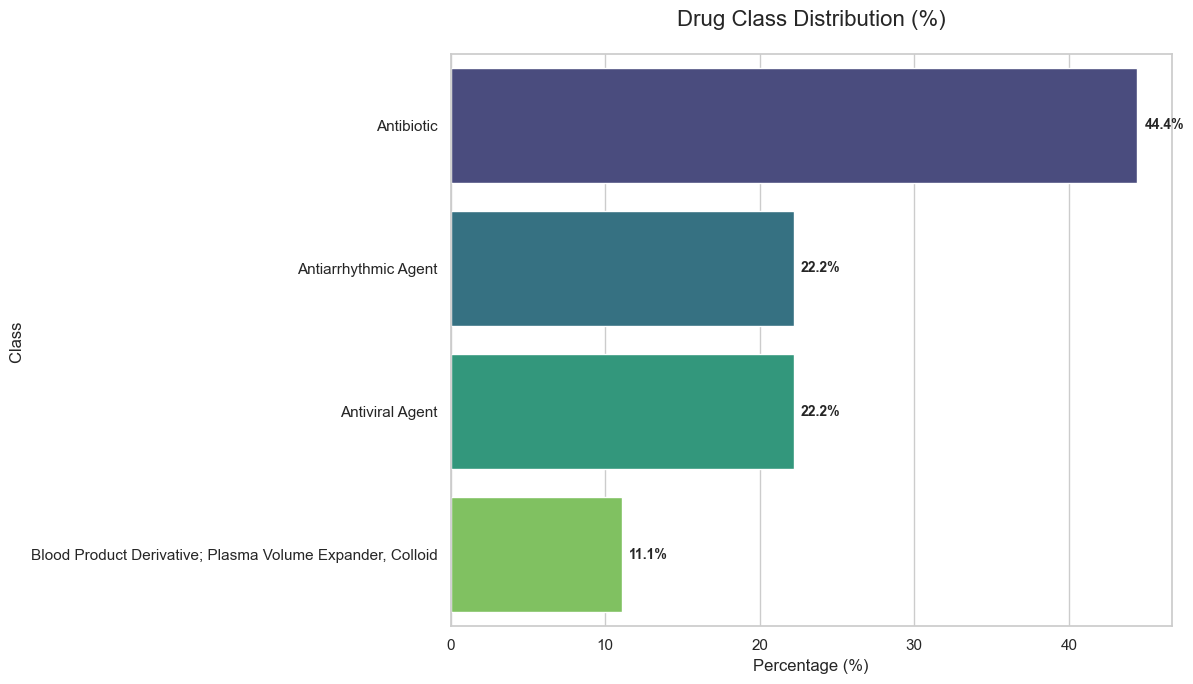

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

class_percent = (
    df['Class ']
    .value_counts(normalize=True) * 100
).reset_index()

class_percent.columns = ['Class ', 'Percentage']

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=class_percent,
    y='Class ',
    x='Percentage',
    palette='viridis',
    order=class_percent.sort_values('Percentage', ascending=False)['Class ']
)

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%.1f%%',   
        padding=5,
        fontsize=10,
        weight='bold'
    )


plt.title('Drug Class Distribution (%)', fontsize=16, pad=20)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Class ', fontsize=12)

plt.tight_layout()
plt.show()

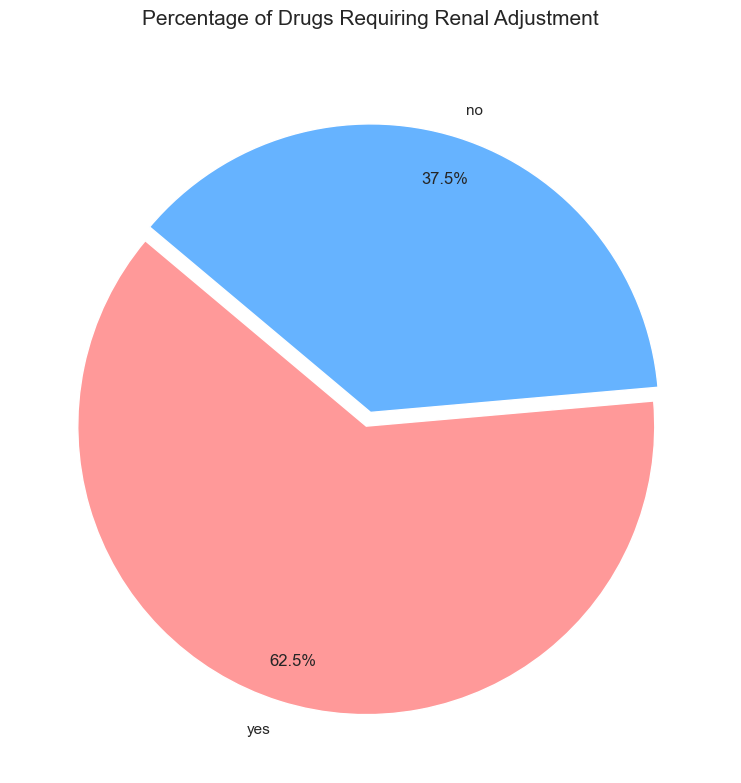

In [7]:
import matplotlib.pyplot as plt

renal_counts = df['renal adjustment'].value_counts()

colors = ['#ff9999','#66b3ff'] 

plt.figure(figsize=(8, 8))
plt.pie(renal_counts, 
        labels=renal_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors, 
        pctdistance=0.85, 
        explode=(0.05, 0)) 

fig = plt.gcf()

plt.title('Percentage of Drugs Requiring Renal Adjustment', fontsize=15, pad=20)

plt.tight_layout()
plt.show()